In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv("house_price_regression_dataset.csv")
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [8]:
data.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [13]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [13]:
#checking for null values
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [15]:
#check summary
data.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


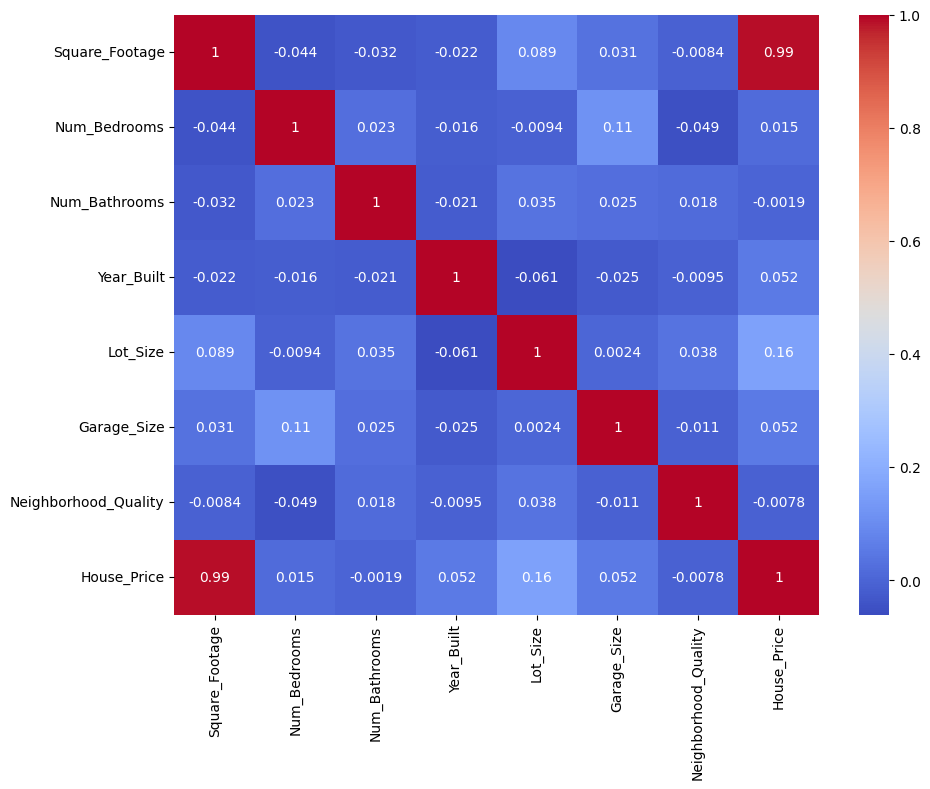

In [17]:
plt.figure(figsize=(10, 8))

sns.heatmap(data.corr() , cmap='coolwarm' , annot=True)
plt.tight_layout()
plt.savefig("heatmap.png",dpi = 300,bbox_inches='tight')
plt.show()

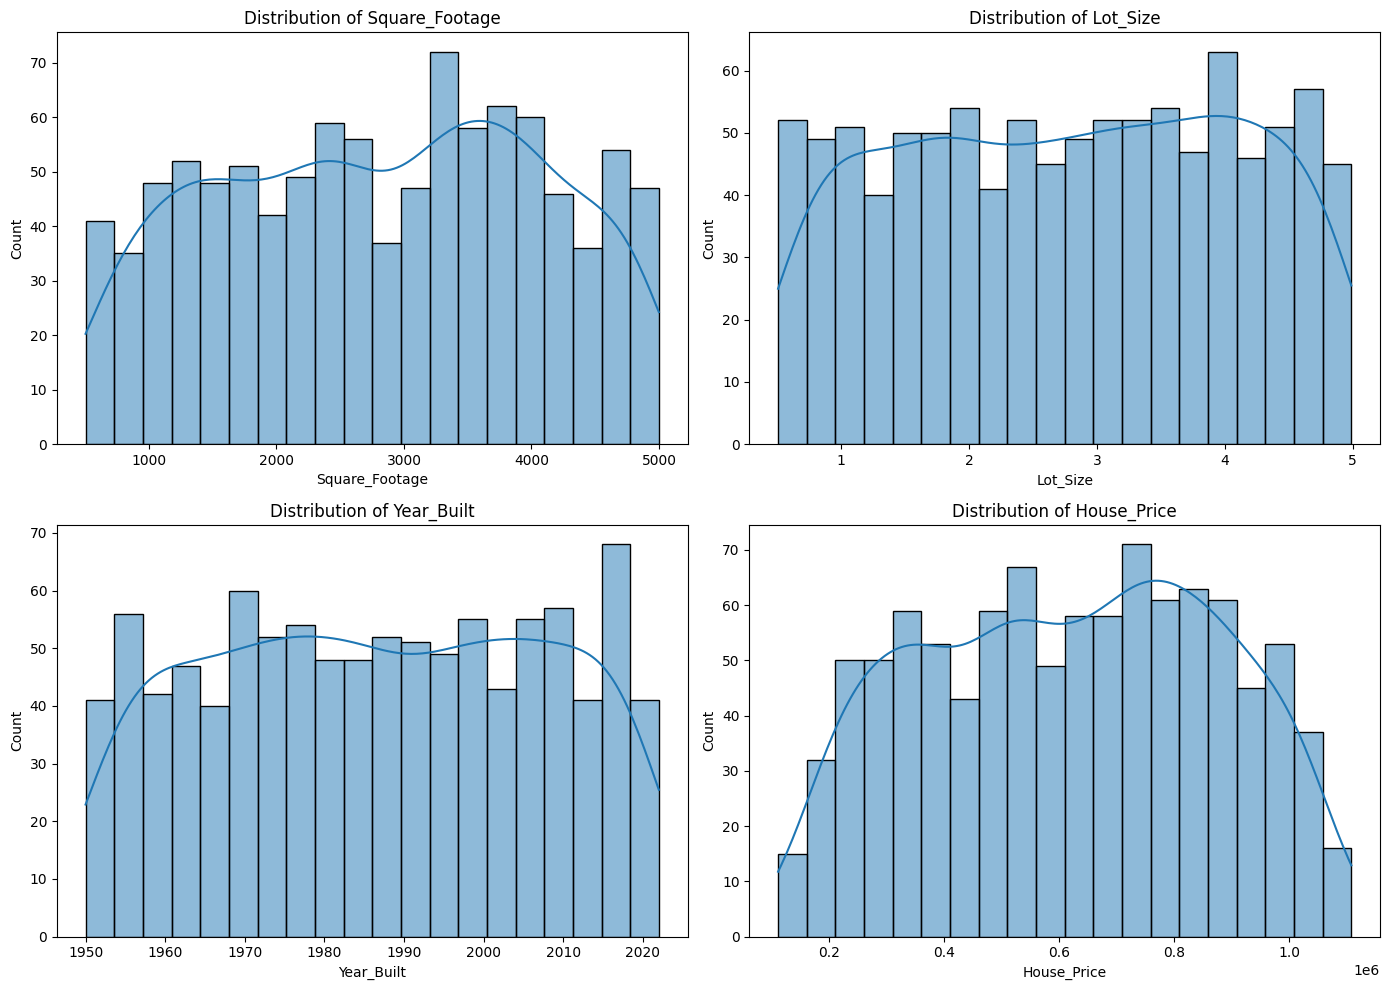

In [35]:
features1 = ['Square_Footage', 'Lot_Size', 'Year_Built', 'House_Price']
plt.figure(figsize=(14,10))

for i, col in enumerate(features1):
    plt.subplot(2,2,i+1)
    sns.histplot(data[col] , bins= 20 , kde = True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig("historgram_Continous.png",dpi = 300,bbox_inches='tight')
plt.show()


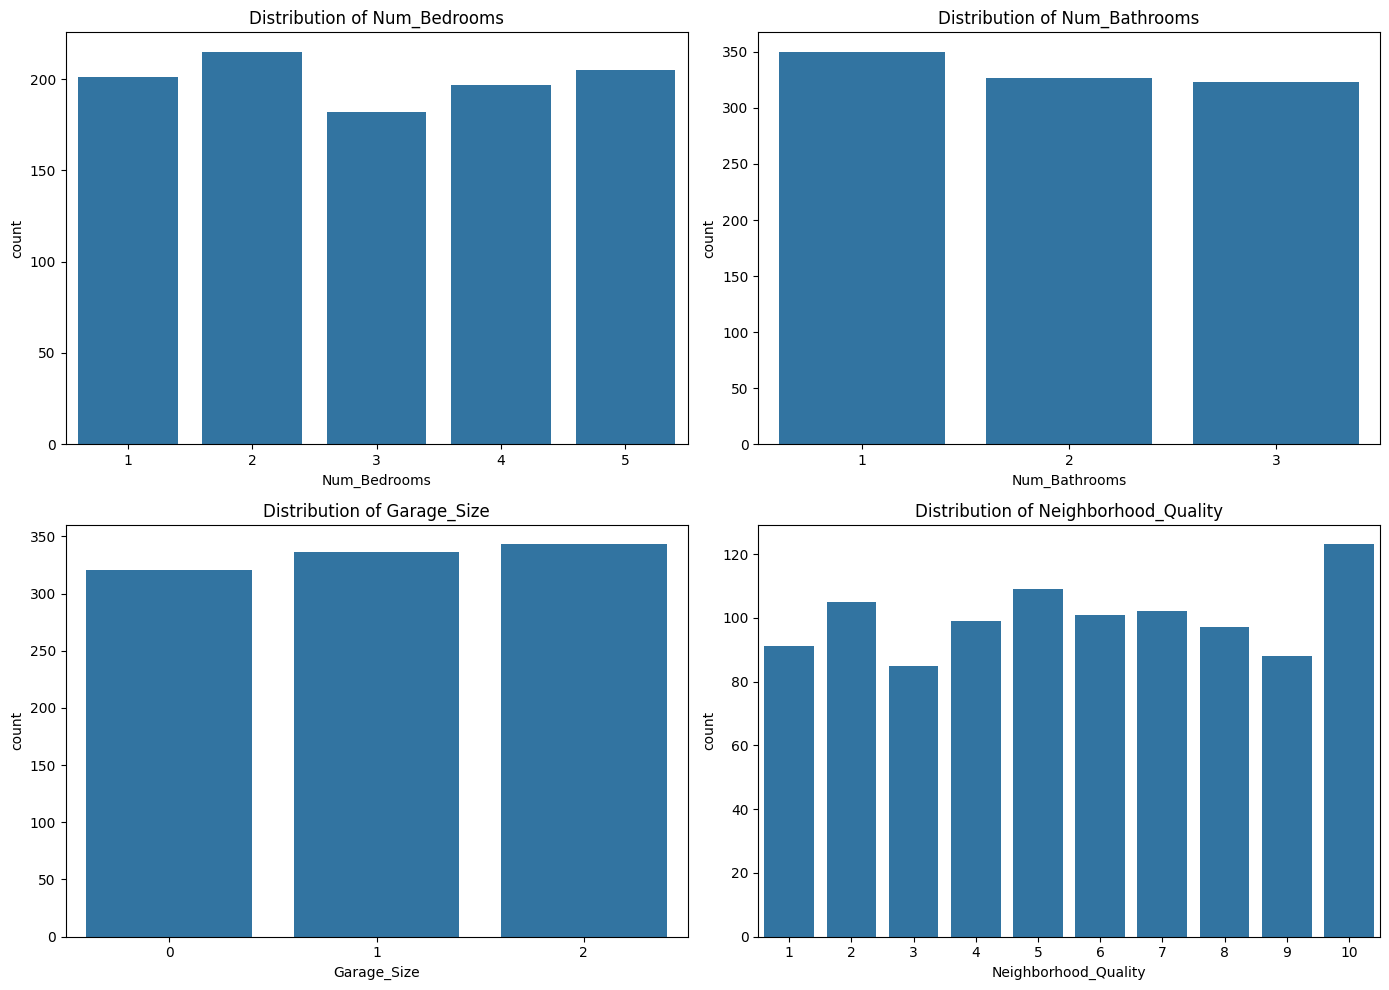

In [34]:
features1 = ['Num_Bedrooms','Num_Bathrooms','Garage_Size','Neighborhood_Quality']
plt.figure(figsize=(14,10))

for i, col in enumerate(features1):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[col])
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig("CountPlot_Discrete.png",dpi = 300,bbox_inches='tight')
plt.show()


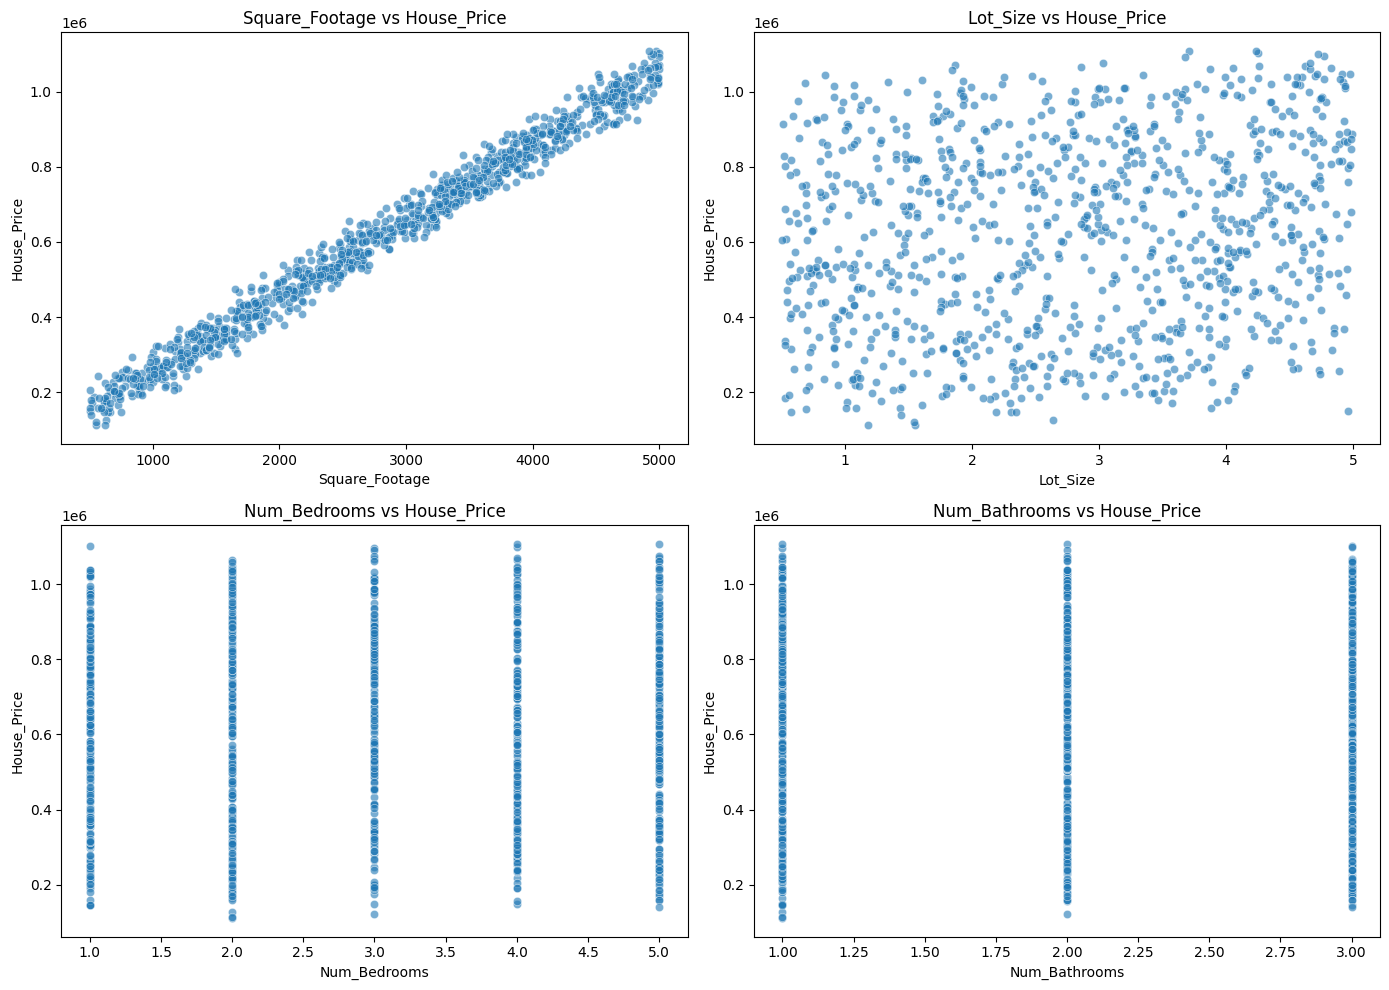

In [25]:
features1 = ['Square_Footage', 'Lot_Size',
             'Num_Bedrooms', 'Num_Bathrooms']

plt.figure(figsize=(14,10))

for i, col in enumerate(features1):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=data[col], y=data['House_Price'], alpha=0.6)
    plt.title(f'{col} vs House_Price')
    plt.xlabel(col)
    plt.ylabel('House_Price')

plt.tight_layout()
plt.savefig("scatter_group1.png", dpi=300, bbox_inches='tight')
plt.show()

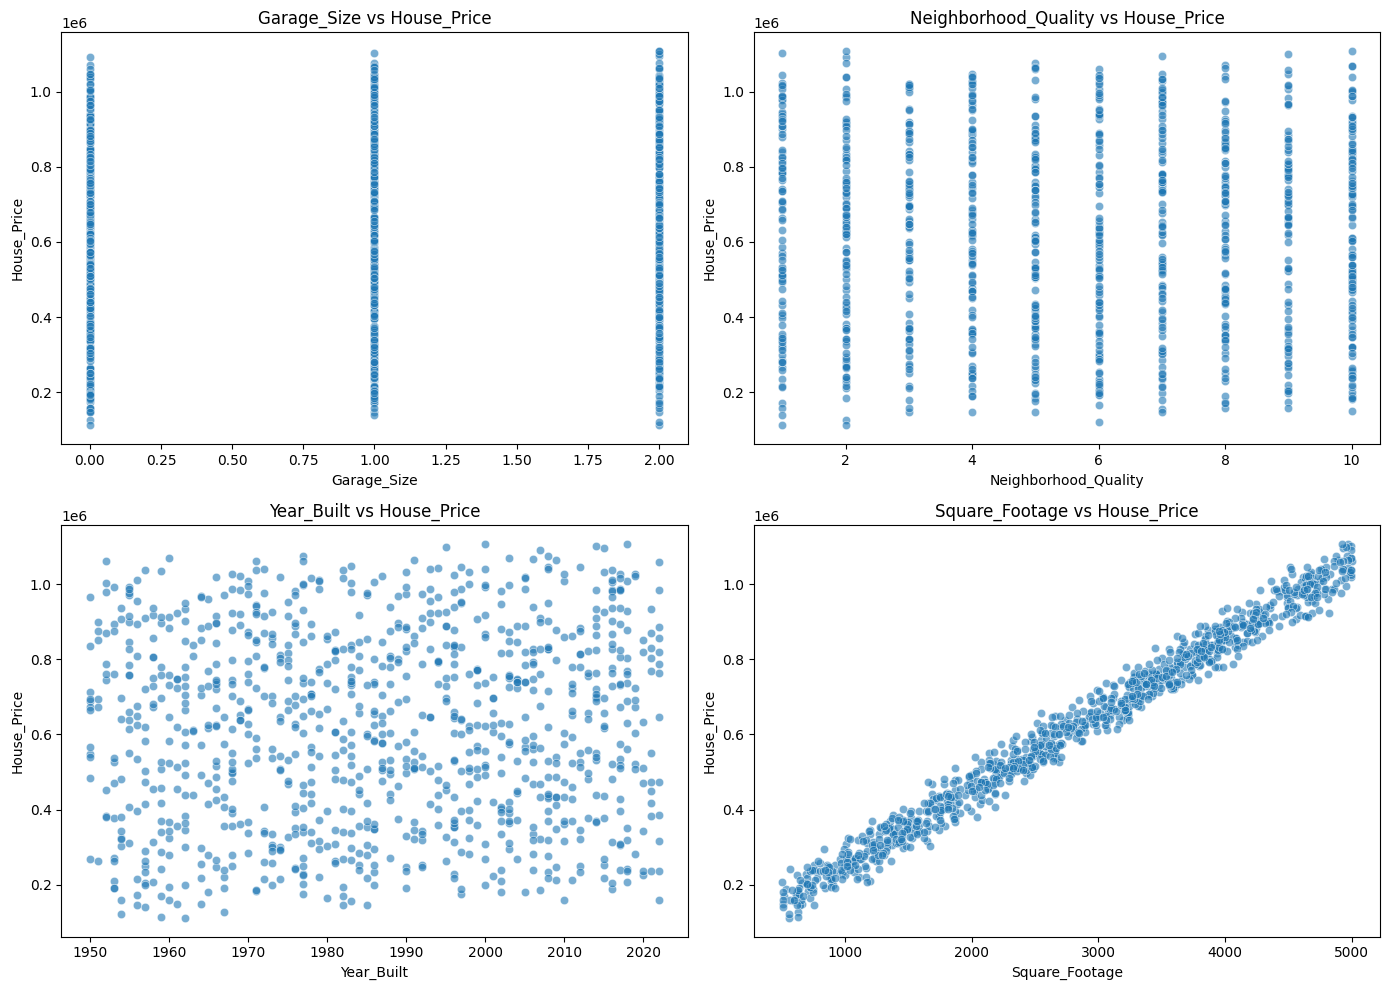

In [26]:
features2 = ['Garage_Size', 'Neighborhood_Quality',
             'Year_Built', 'Square_Footage']  # remove duplicate if already used

plt.figure(figsize=(14,10))

for i, col in enumerate(features2):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=data[col], y=data['House_Price'], alpha=0.6)
    plt.title(f'{col} vs House_Price')
    plt.xlabel(col)
    plt.ylabel('House_Price')

plt.tight_layout()
plt.savefig("scatter_group2.png", dpi=300, bbox_inches='tight')
plt.show()
